<div style="text-align: center;"> 
    <span style="font-size: 40px; font-weight: bold">
        Lập trình cho Khoa học dữ liệu - CQ2023/21
    </span>
</div>

<div style="text-align: center;"> 
    <span style="font-size: 24px; font-weight: bold">
        <i>
            03. Modeling
        </i>
    </span>
</div>

<div style="text-align: center;"> 
    <span style="font-size: 18px">
            Nguyễn Lê Tấn Phát - 22120262
    </span>
</div>

<div style="text-align: right;">
    <span style="font-size: 14px">
        <i>
            Nov 23, 2025
        </i>
    </span>
</div>

---

<h1 align="center">
    <span style="font-size: 40px; font-weight: bold">
        Mục lục
    </span style>
</h1>

- [**I. Chuẩn bị thư viện**](#i)

- [**II. Chuẩn bị dữ liệu**](#ii)

- [**III. Huấn luyện mô hình Logistic Regression sử dụng dữ liệu Undersampling**](#iii)

    - [**1. Huấn luyện**](#iii_1)

    - [**2. Đánh giá**](#iii_2)

- [**IV. Huấn luyện mô hình Logistic Regressoin sử dụng dữ liệu SMOTE**](#iv)

    - [**1. Huấn luyện**](#iv_1)

    - [**2. Đánh giá**](#iv_2)

- [**V. Đánh giá**](#v)

---

<h1 id="i" style="font-weight: bold">I. Chuẩn bị thư viện</h1>

In [42]:
import numpy as np
import os
import sys

sys.path.append(os.path.abspath('..'))
from src.model import LogisticRegression, evaluate_comprehensive
from src.visualization import plot_comparison_bar, plot_model_report

---

<h1 id="ii" style="font-weight: bold">II. Chuẩn bị dữ liệu</h1>

In [43]:
processed_dir = '../data/processed'

def load_npz(name):
    path = os.path.join(processed_dir, name)
    with np.load(path) as data:
        return data['X'], data['y']

X_test, y_test = load_npz('test_data.npz')
X_train_under, y_train_under = load_npz('train_under.npz')
X_train_smote, y_train_smote = load_npz('train_smote.npz')

print(f"Test Data: {X_test.shape}")
print(f"Train Under: {X_train_under.shape}")
print(f"Train SMOTE: {X_train_smote.shape}")

Test Data: (56962, 30)
Train Under: (774, 30)
Train SMOTE: (454916, 30)


---

<h1 id="iii" style="font-weight: bold">III. Huấn luyện mô hình Logistic Regression sử dụng dữ liệu Undersampling</h1>

<h2 id="iii_1" style="font-weight: bold">1. Huấn luyện</h2>

In [44]:
model_u = LogisticRegression(learning_rate=0.01, n_iterations=1500)
model_u.fit(X_train_under, y_train_under)

<h2 id="iii_2" style="font-weight: bold">2. Đánh giá</h2>

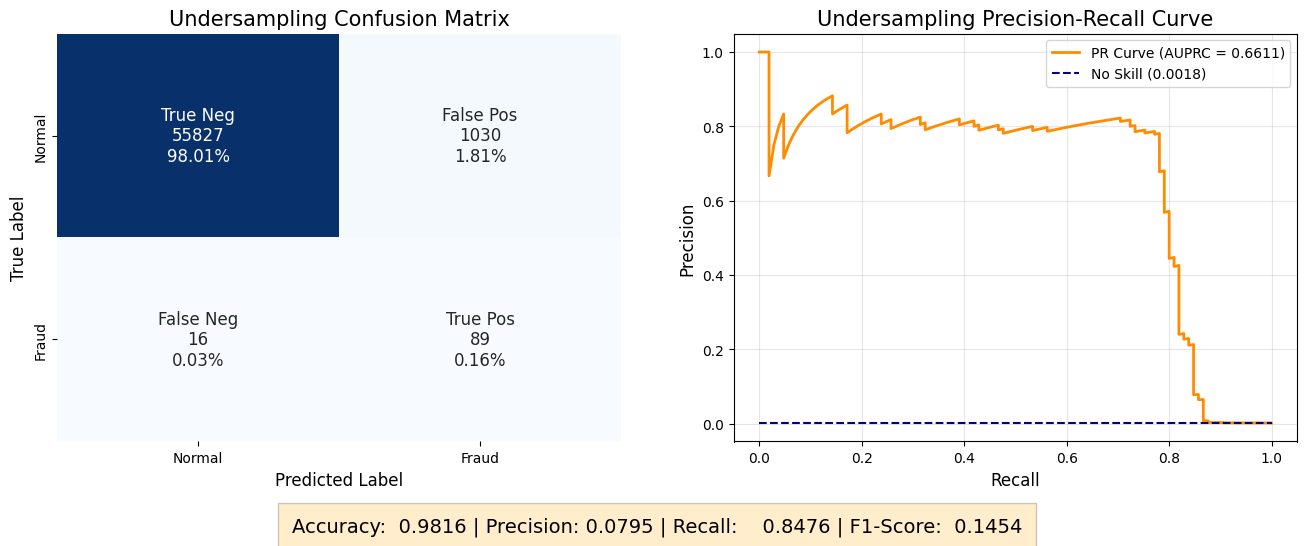

In [45]:
pred_class_u = model_u.predict(X_test)
pred_proba_u = model_u.predict_proba(X_test)

res_u = evaluate_comprehensive(y_test, pred_class_u, pred_proba_u)

plot_model_report(res_u, model_name="Undersampling")

**1. Confusion Matrix**

- **True Negative (TN = 55,827 | 98.01%)**

    - Mô hình dự đoán đúng hầu hết các giao dịch bình thường.

- **False Positive (FP = 1,030 | 1.81%)**

    - Tỷ lệ FP tương đối cao so với số lượng giao dịch fraud thực tế.

    - Điều này gây phiền cho khách hàng (báo nhầm giao dịch hợp lệ).

- **False Negative (FN = 16 | 0.03%)**

    - FN rất thấp → mô hình ít bỏ sót giao dịch gian lận, đây là điểm cực kỳ quan trọng.

- **True Positive (TP = 89 | 0.16%)**
    
    - Bắt được phần lớn fraud trong tập test.

$\Rightarrow$ Undersampling giúp mô hình ưu tiên phát hiện fraud (giảm FN mạnh), nhưng phải đánh đổi bằng việc tăng đáng kể FP.

**2. Precision – Recall & AUPRC**

- **AUPRC = 0.6611**

    - Mức này là tốt đối với bài toán imbalance cực nặng (fraud ~0.1%).

    - Mô hình có khả năng phân biệt fraud ở mức hợp lý.

- Đường PR ổn định, precision dao động quanh 0.75–0.85 khi recall thấp–trung bình.

- Khi recall tăng gần 0.9 → precision giảm mạnh (điểm trade-off tự nhiên của undersampling).

$\Rightarrow$ Mô hình có khả năng phát hiện fraud tốt (recall cao), nhưng precision thấp hơn vì undersampling làm mất cân bằng thông tin của lớp normal.

**3. Metrics tổng hợp**

- **Accuracy: 0.9816**

    - Không mang nhiều ý nghĩa vì dữ liệu lệch.

- **Precision: 0.0795**

    - 1 giao dịch bị gắn nhãn fraud thì chỉ có ~8% là thật.

    - Tỷ lệ báo nhầm khá cao → phù hợp khi ưu tiên recall hơn precision.

- **Recall: 0.8476**

    - Rất tốt. Mô hình phát hiện được phần lớn gian lận.

- **F1-Score: 0.1454**

    - Thấp vì precision thấp; phản ánh sự đánh đổi của undersampling.

---

<h1 id="iv" style="font-weight: bold">IV. Huấn luyện mô hình Logistic Regression sử dụng dữ liệu SMOTE</h1>

<h2 id="iv_1" style="font-weight: bold">1. Huấn luyện</h2>

In [46]:
model_s = LogisticRegression(learning_rate=0.01, n_iterations=1500)
model_s.fit(X_train_smote, y_train_smote)

<h2 id="iv_2" style="font-weight: bold">2. Đánh giá</h2>

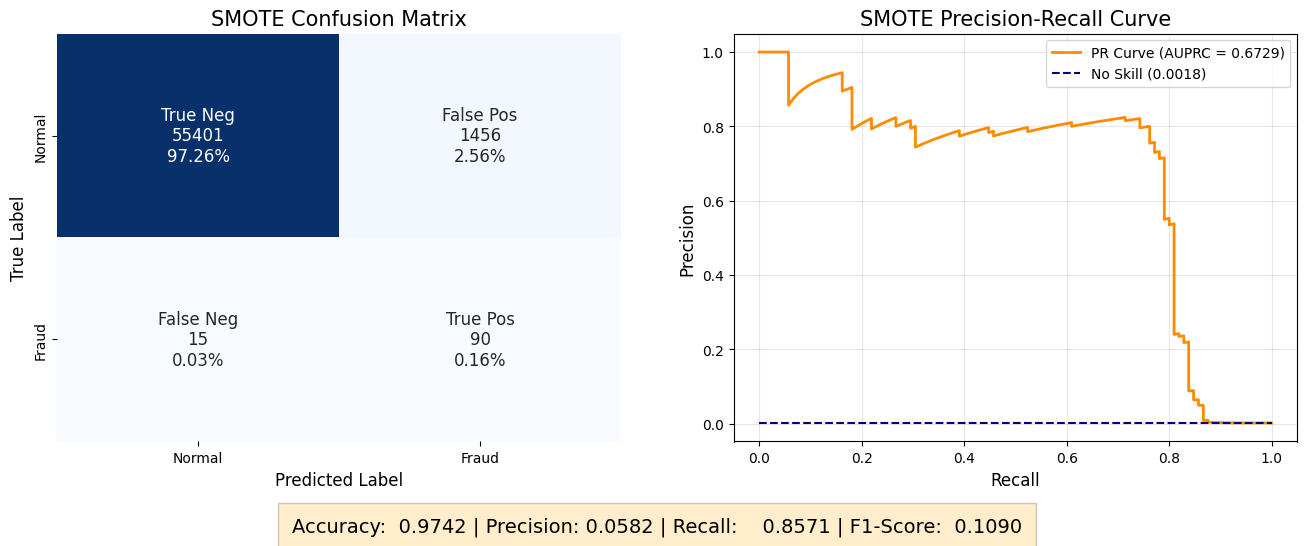

In [47]:
pred_class_s = model_s.predict(X_test)
pred_proba_s = model_s.predict_proba(X_test)

res_s = evaluate_comprehensive(y_test, pred_class_s, pred_proba_s)

plot_model_report(res_s, model_name="SMOTE")

**1. Confusion Matrix**

- **True Negative (TN = 55,401 | 97.26%)**

    - Mô hình dự đoán đúng phần lớn các giao dịch bình thường.

- **False Positive (FP = 1,456 | 2.56%)**

    - FP tăng khá mạnh so với số lượng giao dịch fraud thực tế.  

    -Điều này gây phiền cho khách hàng vì nhiều giao dịch hợp lệ bị báo nhầm là gian lận. 

- **False Negative (FN = 15 | 0.03%)**

    - FN rất thấp → mô hình hầu như không bỏ sót giao dịch gian lận.  

    - Đây là điểm mạnh nhất của SMOTE và rất quan trọng trong phát hiện fraud.

- **True Positive (TP = 90 | 0.16%)**

    - Mô hình bắt được phần lớn các giao dịch gian lận trên tập test.

$\Rightarrow$ SMOTE giúp tăng khả năng phát hiện fraud (giảm FN xuống mức cực thấp), nhưng đổi lại FP tăng đáng kể.

**2. Precision – Recall & AUPRC**

- **AUPRC = 0.6729**

    - Cao hơn so với Undersampling (0.6611).  

- Đường PR khá ổn định:

    - Precision giữ mức 0.75–0.85 khi recall thấp–trung bình.  

    - Khi recall tiến gần 0.85–0.9 → precision giảm mạnh, phản ánh đúng sự đánh đổi của SMOTE (ưu tiên recall hơn precision).

$\Rightarrow$ Mô hình có khả năng phân biệt fraud tốt, đặc biệt mạnh ở recall, phù hợp khi mục tiêu là "không bỏ sót giao dịch gian lận".


**3. Metrics tổng hợp**

- **Accuracy: 0.9742**

    - Không mang nhiều ý nghĩa do dữ liệu rất lệch.

- **Precision: 0.0582**

    - Chỉ ~5.8% giao dịch bị dự đoán là fraud thực sự là fraud.  

    - Tỷ lệ báo nhầm rất cao → điều này xuất phát từ việc SMOTE làm tăng số điểm synthetic fraud, khiến mô hình đánh nhãn fraud nhiều hơn.

- **Recall: 0.8571**

    - Rất tốt. Mô hình phát hiện được hầu hết giao dịch gian lận.

- **F1-Score: 0.1090**

    - Thấp vì precision thấp, dù recall cao.  

    - Thể hiện sự đánh đổi tự nhiên của SMOTE: ưu tiên bắt được fraud hơn là giảm báo nhầm.

---

<h1 id="v" style="font-weight: bold">V. Đánh giá</h1>

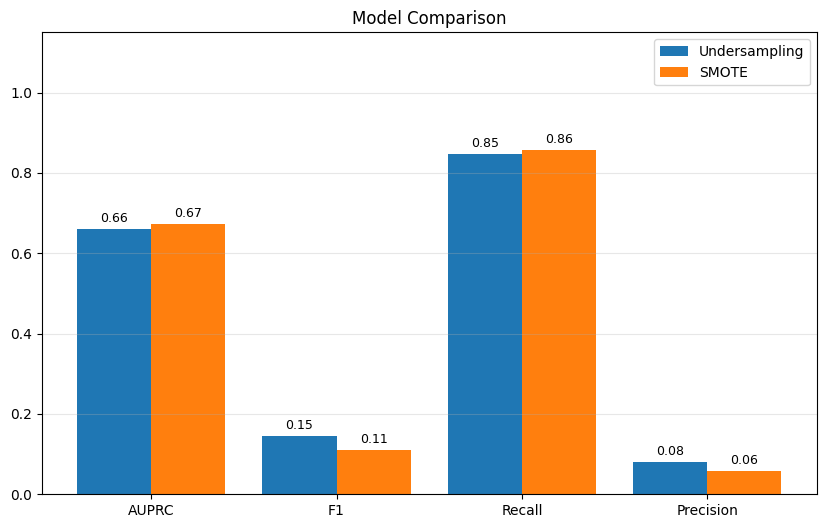

In [48]:
comparison_data = {
    "Undersampling": res_u,
    "SMOTE": res_s
}
plot_comparison_bar(comparison_data)

**1. So sánh AUPRC**

- **Undersampling: 0.66**

- **SMOTE: 0.67**

Cả hai kỹ thuật cho AUPRC gần như tương đương.  

$\Rightarrow$ **SMOTE nhỉnh hơn một chút**, cho thấy mô hình học được ranh giới lớp tốt hơn khi dữ liệu fraud được tổng hợp thêm.

**2. So sánh F1-Score**

- **Undersampling: 0.15**

- **SMOTE: 0.11**

**Undersampling vượt trội hơn** về F1-score.  

$\Rightarrow$ Điều này xảy ra vì SMOTE làm tăng số lượng mẫu fraud giả $\rightarrow$ mô hình dễ overfit $\rightarrow$ precision thấp hơn, kéo F1-score xuống.

**3. So sánh Recall**

- **Undersampling: 0.85**

- **SMOTE: 0.86**

Cả hai đều đạt **recall rất cao**, tức mô hình phát hiện fraud hiệu quả.  

$\Rightarrow$ **SMOTE cao hơn nhẹ**, nhờ việc tăng số lượng mẫu fraud giúp mô hình học nhiều đặc trưng hơn.

**4. So sánh Precision**

- **Undersampling: 0.08**

- **SMOTE: 0.06**

Precision của cả hai đều thấp (đặc trưng của bài toán imbalance).  

$\Rightarrow$ **SMOTE có precision thấp hơn**, tức là báo nhầm nhiều hơn $\rightarrow$ dễ gây phiền hà cho khách hàng.


**Kết luận tổng quan**

**Undersampling phù hợp khi muốn giảm FP và tăng Precision → F1 tốt hơn.**  

- Hợp khi hệ thống muốn tránh báo nhầm quá nhiều giao dịch hợp lệ.

**SMOTE phù hợp khi ưu tiên Recall ở mức cao nhất.**  

- Hợp cho mô hình chống gian lận khi muốn bắt càng nhiều fraud càng tốt, chấp nhận FP cao.

| Chỉ số      | Undersampling | SMOTE | Nhận xét |
|-------------|---------------|-------|----------|
| **AUPRC**   | 0.66 | 0.67 | SMOTE tốt hơn chút |
| **F1**      | 0.15 | 0.11 | Undersampling vượt trội |
| **Recall**  | 0.85 | 0.86 | Gần như ngang nhau |
| **Precision** | 0.08 | 0.06 | SMOTE báo nhầm nhiều hơn |
